In [ ]:
!pip install mne
!pip install PyWavelets
!pip install imblearn
!pip install tensorflow
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 25.5 MB/s eta 0:00:00


--2024-11-06 14:52:22--  https://physionet.org/files/eegmat/1.0.0/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/eegmat/1.0.0/index.html’

physionet.org/files     [ <=>                ]   9.10K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2024-11-06 14:52:22 (177 MB/s) - ‘physionet.org/files/eegmat/1.0.0/index.html’ saved [9320]

Loading robots.txt; please ignore errors.
--2024-11-06 14:52:22--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 22 [text/plain]
Saving to: ‘physionet.org/robots.txt’

physionet.org/robot 100%[===================>]      22  --.-KB/s    in 0s      

2024-11-06 14:52:22 (8.56 MB/s) - ‘physionet.org/robots.txt’ saved [22/22]

--2024-11-06 14:52:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 8s/step - accuracy: 0.5208 - loss: 1.6416 - val_accuracy: 1.0000 - val_loss: 0.6889
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 8s/step - accuracy: 0.3423 - loss: 1.6369 - val_accuracy: 1.0000 - val_loss: 0.6830
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 7s/step - accuracy: 0.3631 - loss: 1.6909 - val_accuracy: 1.0000 - val_loss: 0.6769
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.3423 - loss: 1.6263 - val_accuracy: 1.0000 - val_loss: 0.6698
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 8s/step - accuracy: 0.3214 - loss: 1.5538 - val_accuracy: 1.0000 - val_loss: 0.6610
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.3631 - loss: 1.6615 - val_accuracy: 1.0000 - val_loss: 0.6511
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.3214 - loss: 1.5559 - val_accuracy: 1.0000 - val_loss: 0.6411
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.3631 - loss: 1.6697 - val_accuracy: 1.0000 - val_loss: 0.6298
Epoch 9/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

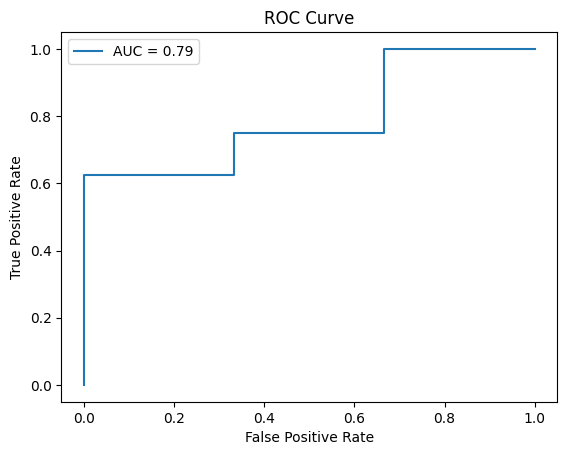

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import mne
import pywt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

# Download dataset
!wget -r -N -c -np https://physionet.org/files/eegmat/1.0.0/
subject_info = pd.read_csv('/content/physionet.org/files/eegmat/1.0.0/subject-info.csv')
subject_info.set_index('Subject', inplace=True)

# Function to load EEG data
def load_subject_data(subject_id):
    background_path = f'/content/physionet.org/files/eegmat/1.0.0/Subject{subject_id:02d}_1.edf'
    task_path = f'/content/physionet.org/files/eegmat/1.0.0/Subject{subject_id:02d}_2.edf'
    background_data = mne.io.read_raw_edf(background_path, preload=True)
    task_data = mne.io.read_raw_edf(task_path, preload=True)
    background_array, _ = background_data[:, :]
    task_array, _ = task_data[:, :]
    return np.concatenate((background_array, task_array), axis=1)

# Function to apply DWT for feature extraction
def apply_dwt(data, wavelet='db8'):
    coeffs = [pywt.wavedec(channel, wavelet, level=4) for channel in data]
    return np.array([np.concatenate([c[-1], c[-2], c[-3], c[-4], c[-5]]) for c in coeffs])

# Process and prepare data
processed_data, labels = [], []
for subject_id in subject_info.index:
    subject_id_int = int(subject_id.replace('Subject', ''))
    subject_data = load_subject_data(subject_id_int)
    processed_subject_data = apply_dwt(subject_data)
    processed_data.append(processed_subject_data)
    label = subject_info.loc[subject_id, 'Count quality']
    labels.append(label)

# Pad or truncate data to ensure consistent shape
max_channels = max(data.shape[0] for data in processed_data)
max_length = max(data.shape[1] for data in processed_data)
padded_data = []
for data in processed_data:
    channel_padded = np.pad(data, ((0, max_channels - data.shape[0]), (0, 0)), mode='constant')
    padded_data.append(np.pad(channel_padded, ((0, 0), (0, max_length - channel_padded.shape[1])), mode='constant'))

# Convert to numpy arrays
X = np.array(padded_data)
y = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape and apply SMOTE for class balancing with a more balanced approach
X_train_flat = X_train.reshape(X_train.shape[0], -1)
smote = SMOTE(sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_flat, y_train)
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], max_channels, max_length)

# Downsample and transpose data for model input
X_train_resampled = X_train_resampled[:, ::2, :].transpose(0, 2, 1)
X_test = X_test[:, ::2, :].transpose(0, 2, 1)

# Updated CNN model with Batch Normalization and additional Conv1D layers
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(16, kernel_size=3, activation='relu'),
    GlobalAveragePooling1D(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with increased class weights for class 0
class_weights = {0: 5.0, 1: 1.0}
history = model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=16, validation_split=0.2, class_weight=class_weights, callbacks=[early_stopping])

# Get predictions and apply a lower threshold
y_pred_proba = model.predict(X_test)
threshold = 0.2
y_pred = (y_pred_proba > threshold).astype(int)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate metrics for class 0 specifically
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_score_0 = f1_score(y_test, y_pred, pos_label=0)


# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

